<font size = 5>Практическая работа №8: "Решение задачи Коши"</font>

<hr>


<font size = 3>Выполнил: студент группы 427
Козлов Алексей</font>

<img src = "var13.jpg">

<font size = 3>Теоретическая часть:</font>

<hr>


Симметрическая неявная схема является одним из численных методов решения задачи Коши для дифференциальных уравнений. Она относится к классу неявных схем, то есть требует решения системы уравнений на каждом временном шаге.
Симметрическая неявная схема является более устойчивой, чем явные схемы, такие как явная схема Эйлера, поскольку она не имеет ограничений на размер шага по времени. Однако, она требует больше вычислительных ресурсов для решения системы уравнений на каждом шаге. 
Для решения задачи Коши с помощью симметрической неявной схемы необходимо:
1. Задать начальные условия для дифференциального уравнения
2. Задать шаг по времени и шаг по координате
3. Вычислить значение функции на следующем временном шаге с помощью системы уравнений, которая определяется с помощью симметрической неявной схемы


Задачу необходимо представить в виде:
$$\begin{equation*}
    \begin{cases}
       \frac{du}{dx}+A(x)u=\phi(x),    x>0 \\
       u(0) = u_{0}
    \end{cases}
\end{equation*}$$

Здесь A(x) - квадратная матрица размера s x s с элементами, зависящими от x, u(x), $\phi(x)$ - вектор-функции размерности s. Под двуслойной схемой понимают разностное уравнение, связывающее значение вектора y(x) для двух слоёв значений аргументов $x = x_{n}$ и $x = x_{n+1}$ю В канонической форме это соотношение задают в виде:
$$
\begin{equation*}
    \begin{cases}
       B\frac{y_{n+1}-y_{n}}{h}+Ay_{n}=\phi_{n} \\
       n = 0,1,2,...,y_{0} = u_{0}
    \end{cases}
\end{equation*}
$$

Где B и A - квадратные матрицы s x s, $y_{n}$, $\phi_{n}$ - векторы размерности s. Если B = E, то каноническую схему называют явной, в противном случае неявной.

Симметрическая схема: 
$$B = E + \frac{1}{2}hA$$

Рассмотрим наше уравнение:
$$ 5y^{''} +8y^{'} + 4y = xe^{-x}, y(0) = 1, y^{'}(0) = 0, x\in [0;2] $$

Введём замену: 
$$ y = y^{'} \: и \: y^{'}_{1} = y_{2} $$

Получим систему:
$$ 
\begin{equation*}
    \begin{cases}
       y^{'}_{1} + 0y_{1} - y_{2} = 0 \\
       y^{'}_{2} + \frac{8y_{2}}{5} + \frac{4y_{1}}{5} = \frac{xe^{-x}}{5}
    \end{cases}
\end{equation*}
$$

Из данной схемы следует:
$$
    \varphi =
    \begin{bmatrix}
    0\\
    \frac{xe^{-x}}{5}
    \end{bmatrix}
    ,\;
    A = 
    \begin{bmatrix}
    0 & -1\\
    \frac{4}{5} & \frac{5}{5}
    \end{bmatrix}
$$





$$
    \frac{y_{n+1} - y_{n}}{h} + \frac{1}{2}A(y_{n+1} + y_{n}) = \varphi(x)
$$

$$
    y_{n+1} + \frac{1}{2}Ahy_{n+1} - y_{n} + \frac{1}{2}Ahy_{n} = h\varphi(x)
$$

$$
    y_{n+1}(E+\frac{1}{2}Ah) = h\varphi(x) + (E+\frac{1}{2}Ah)y_{n}
$$

$$
    y_{n+1} = (E+\frac{1}{2}Ah)^{-1} * (h\varphi(x) + (E+\frac{1}{2}Ah)y_{n})
$$

Решение дифференциального уравнения методом дало нам решение:

$$
    y_{общее} = e^{\frac{-4x}{5}} * (\frac{1}{2}*sin(\frac{2x}{5})-cos(\frac{2x}{5}))+(x+2)*e^{-x}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.integrate as spi

Задание начальных условий

In [2]:
Y = np.array([[1], [0]])
A = np.array([[0, -1], [4 / 5, 8 / 5]])
h = 0.5
eps = 0.01

Дифференциальное уравнение 

In [3]:
def func(y, x):
    return [y[1], (x * np.exp(-x) - 8 * y[1] - 4 * y[0]) / 5]

In [4]:
# аналитическая функция
def YA(x):
    return np.exp((-4 / 5) * x) * ((1 / 2) * np.sin((2 / 5) * x) - np.cos((2 / 5) * x)) + (x + 2) * np.exp(-x)

In [5]:
def Simetric(Y, h, eps, A):
    def fi(x):
        return np.asanyarray([[0], [(x * np.exp(-x)) / 5]])

    # Первая прогонка массива у
    h = h  # h=0.5
    j = 0
    A = A
    Y = Y
    eps = eps
    y, y1 = [Y[0]], [Y[1]]
    x = np.arange(0, 2+h, h)
    E = np.identity(2)
    B = E + (1 / 2) * A * h
    a = True
    while a:  # Основной цикл уменьшения h
        y, y1 = [Y[0]], [Y[1]]
        x = np.arange(0, 2+h, h)
        E = np.identity(2)
        B = E + (1 / 2) * A * h
        # обратная матрица для B
        first_matrix = np.linalg.inv(B)
        second_matrix = h * fi(x[0]) + Y - (1 / 2) * h * np.dot(A, Y)
        Yn = np.dot(first_matrix, second_matrix)
        y.append(Yn[0][0])
        y1.append(Yn[1][0])
        for i in range(1, len(x) - 1):
            first_matrix = np.linalg.inv(B)
            second_matrix = h * fi(x[i]) + Yn - (1 / 2) * h * np.dot(A, Yn)
            Yn = np.dot(first_matrix, second_matrix)
            y.append(Yn[0][0])
            y1.append(Yn[1][0])
            
        h /= 2
            
        y_next, y1_next = [Y[0]], [Y[1]]
        x = np.arange(0, 2+h, h)
        E = np.identity(2)
        B = E + (1 / 2) * A * h
        # обратная матрица для B
        first_matrix = np.linalg.inv(B)
        second_matrix = h * fi(x[0]) + Y - (1 / 2) * h * np.dot(A, Y)
        Yn = np.dot(first_matrix, second_matrix)
        y_next.append(Yn[0][0])
        y1_next.append(Yn[1][0])
        for i in range(1, len(x) - 1):
            first_matrix = np.linalg.inv(B)
            second_matrix = h * fi(x[i]) + Yn - (1 / 2) * h * np.dot(A, Yn)
            Yn = np.dot(first_matrix, second_matrix)
            y_next.append(Yn[0][0])
            y1_next.append(Yn[1][0])
            
        h /= 2
        c=y_next[len(y_next)-2]
        d=y[len(y)-1]

        b=abs(c-d)
        a = abs(y_next[len(y_next)-2]-y[len(y)-1])>eps
    return x, y_next, y1_next, h


In [6]:
Y = np.array([[1], [0]])
A = np.asanyarray([[0, -1], [4 / 5, 8 / 5]])
h = 0.5
eps = 0.01

Точное решение задачи Коши с помощью встроенной функции

In [7]:
x, y, y1, h = Simetric(Y, h, eps, A)
print(h)
# odeint
y0 = np.array([1, 0])
x1 = np.linspace(0, 2, len(x))

res = spi.odeint(func, y0, x1)


0.0078125


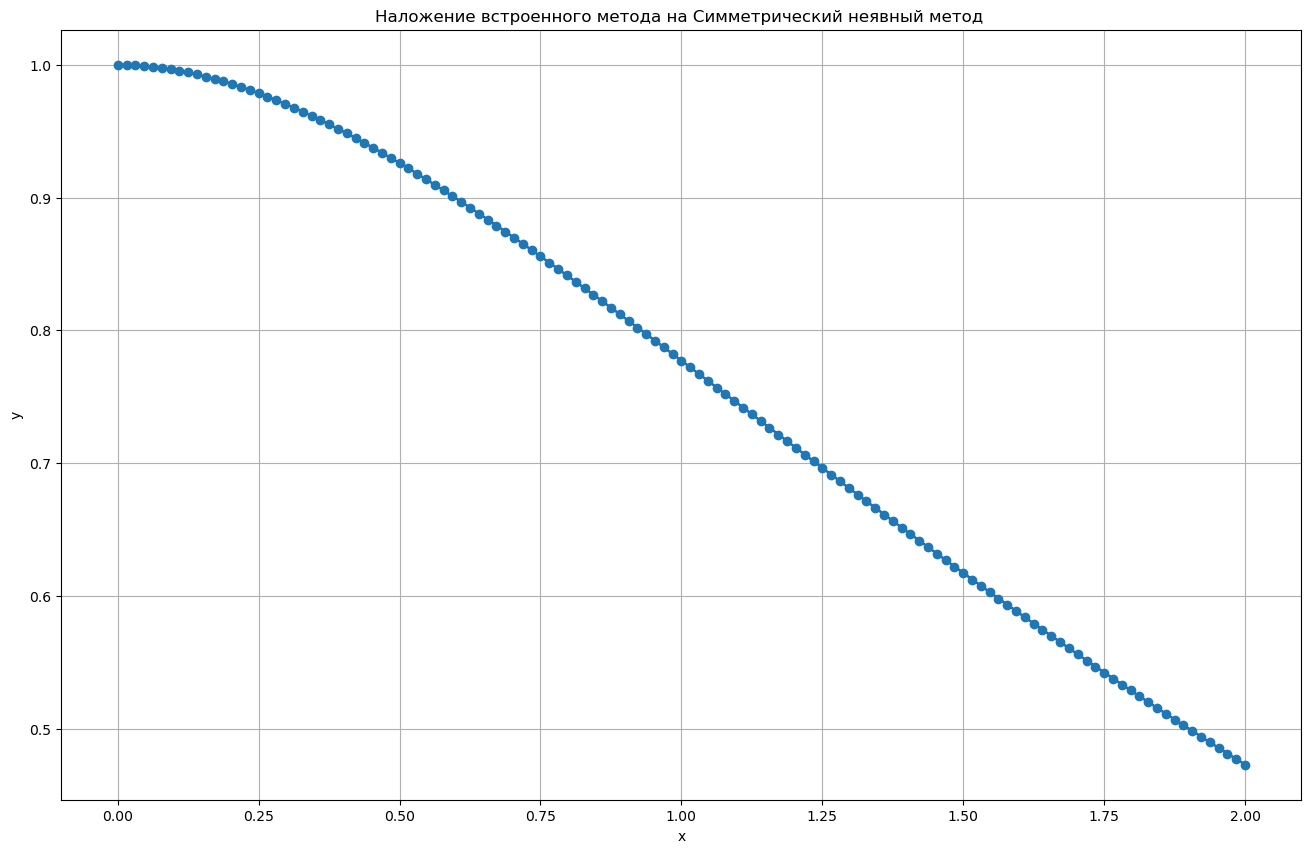

In [16]:
# Аналитическая фуннкция
yA = [YA(x[i]) for i in range(len(x))]
yraz = [y[i] - YA(x[i]) for i in range(len(x))]
# График решения
pylab.figure(figsize=(16, 10))
plt.plot(x1, res[:, 0], 'b')
pylab.plot(x, y, 'o-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title('Наложение встроенного метода на Cимметрический неявный метод ')
plt.show()

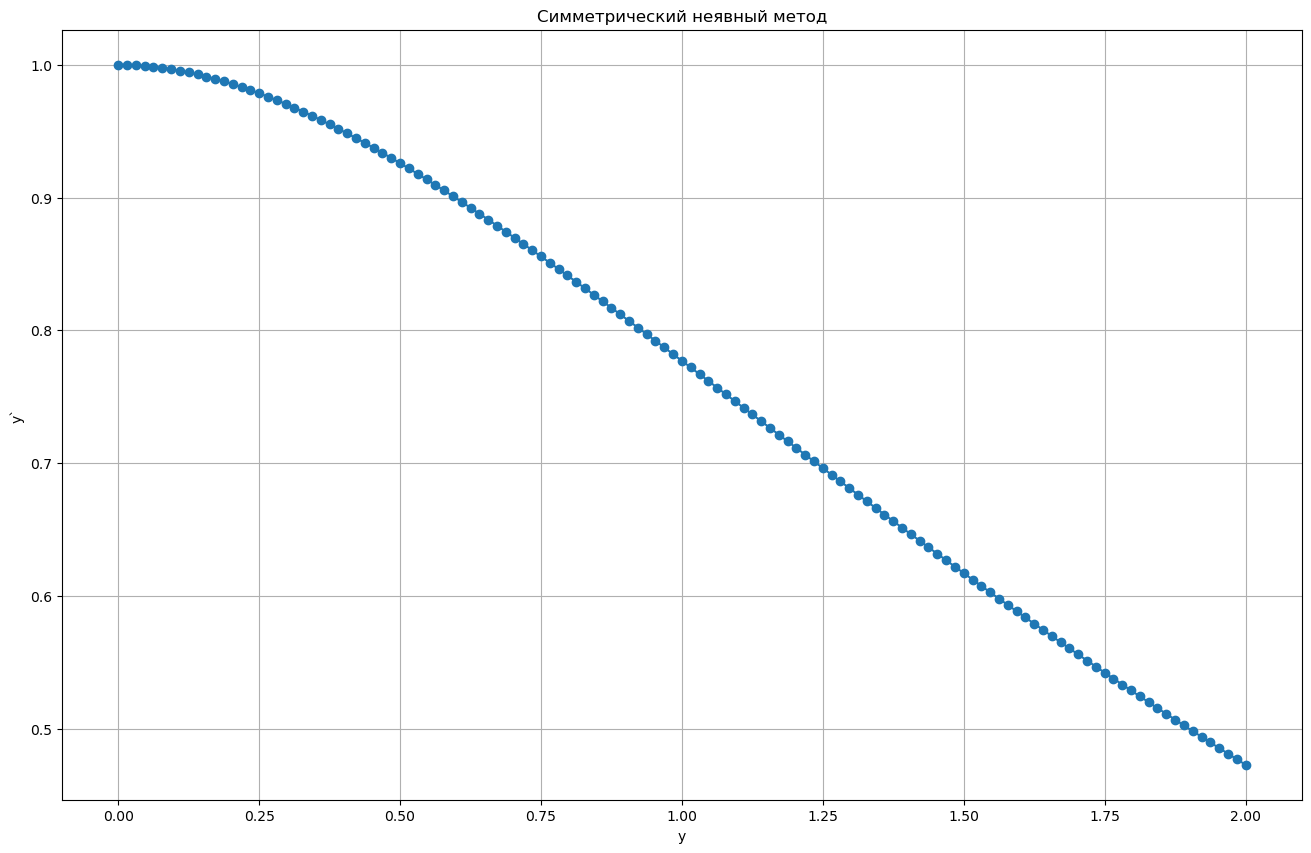

In [17]:
pylab.figure(figsize=(16, 10))
pylab.title('Cимметрический неявный метод')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(x, y, 'o-')
pylab.show()

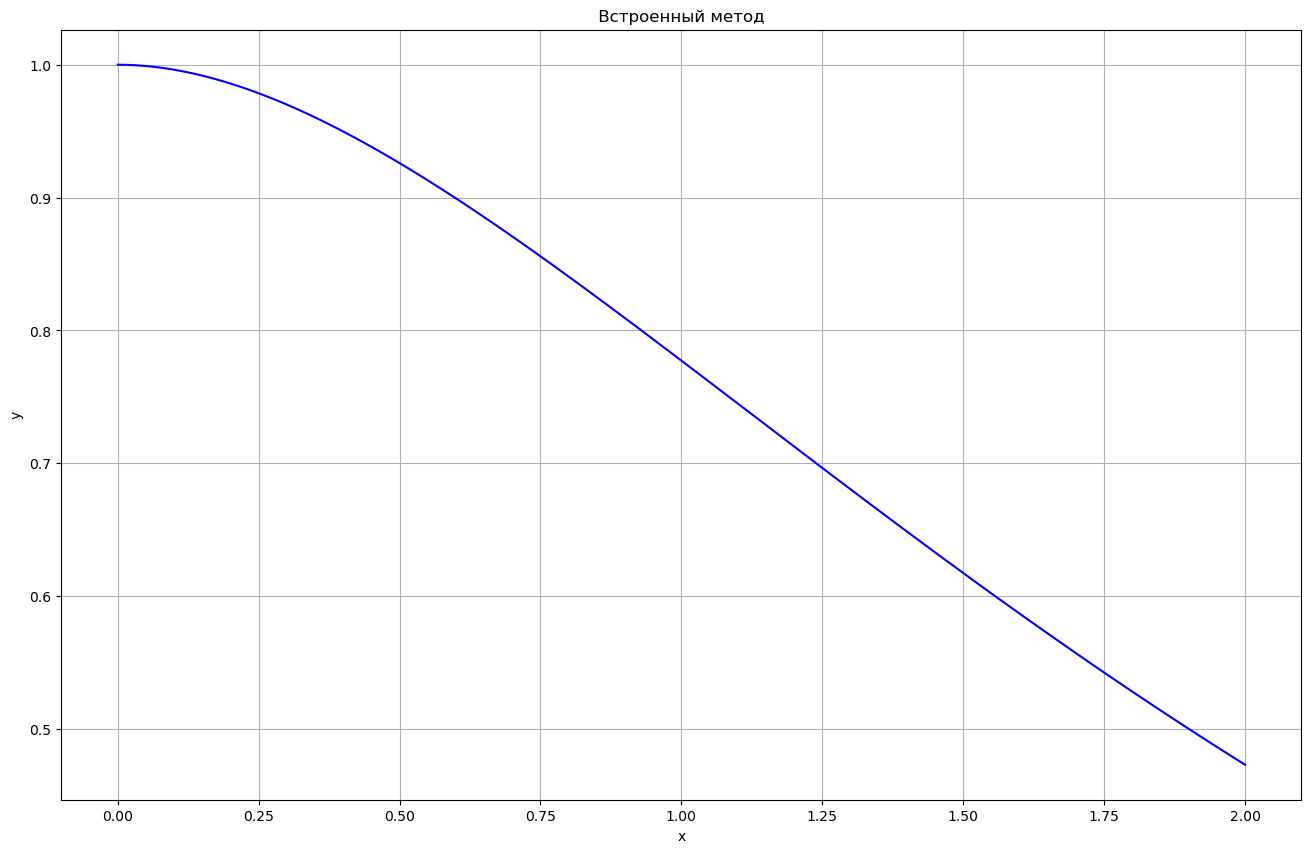

In [18]:
pylab.figure(figsize=(16, 10))
plt.plot(x1, res[:, 0], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title(' Встроенный метод ')
plt.show()

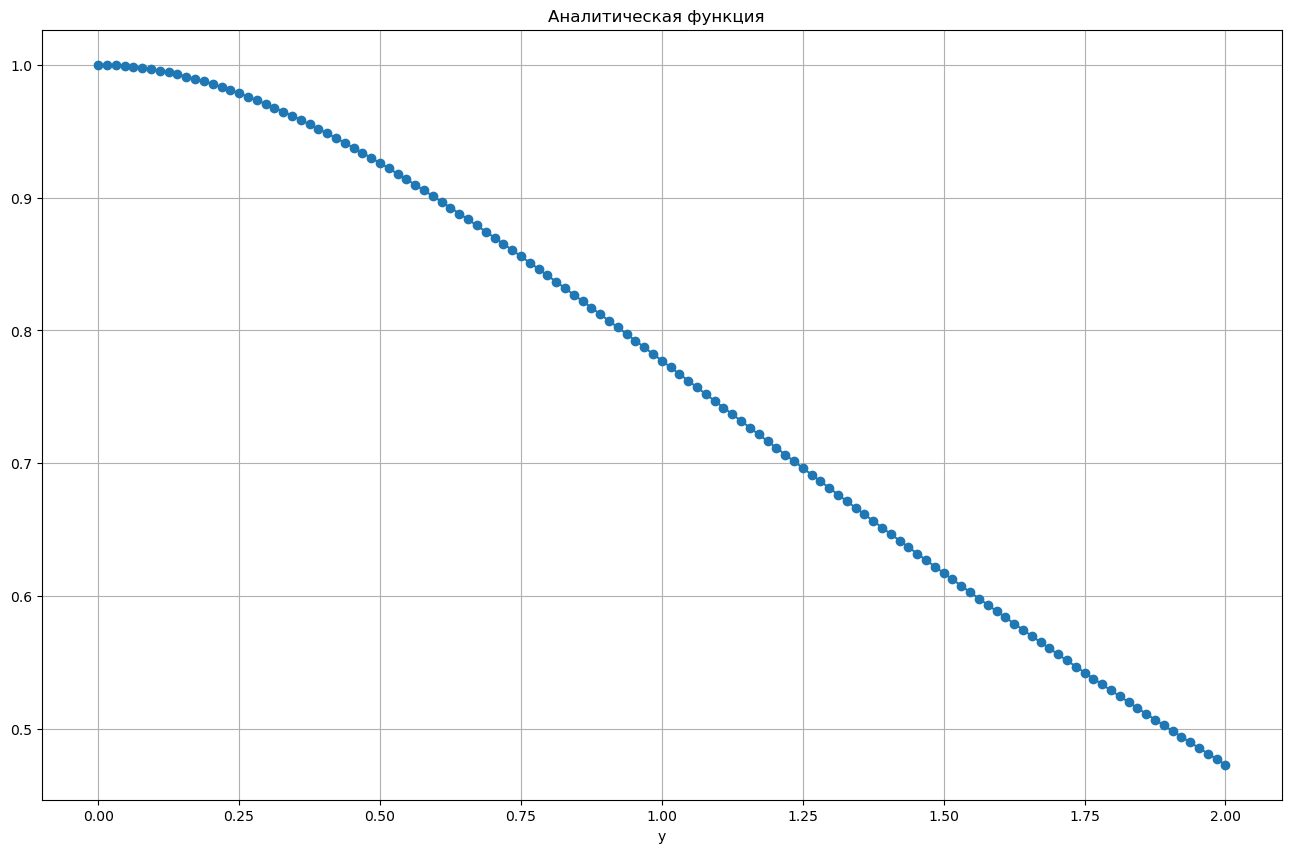

In [19]:
pylab.figure(figsize=(16, 10))
pylab.title('Аналитическая функция  ')
pylab.xlabel('y')
plt.grid(True)
pylab.plot(x, yA, 'o-')
pylab.show()

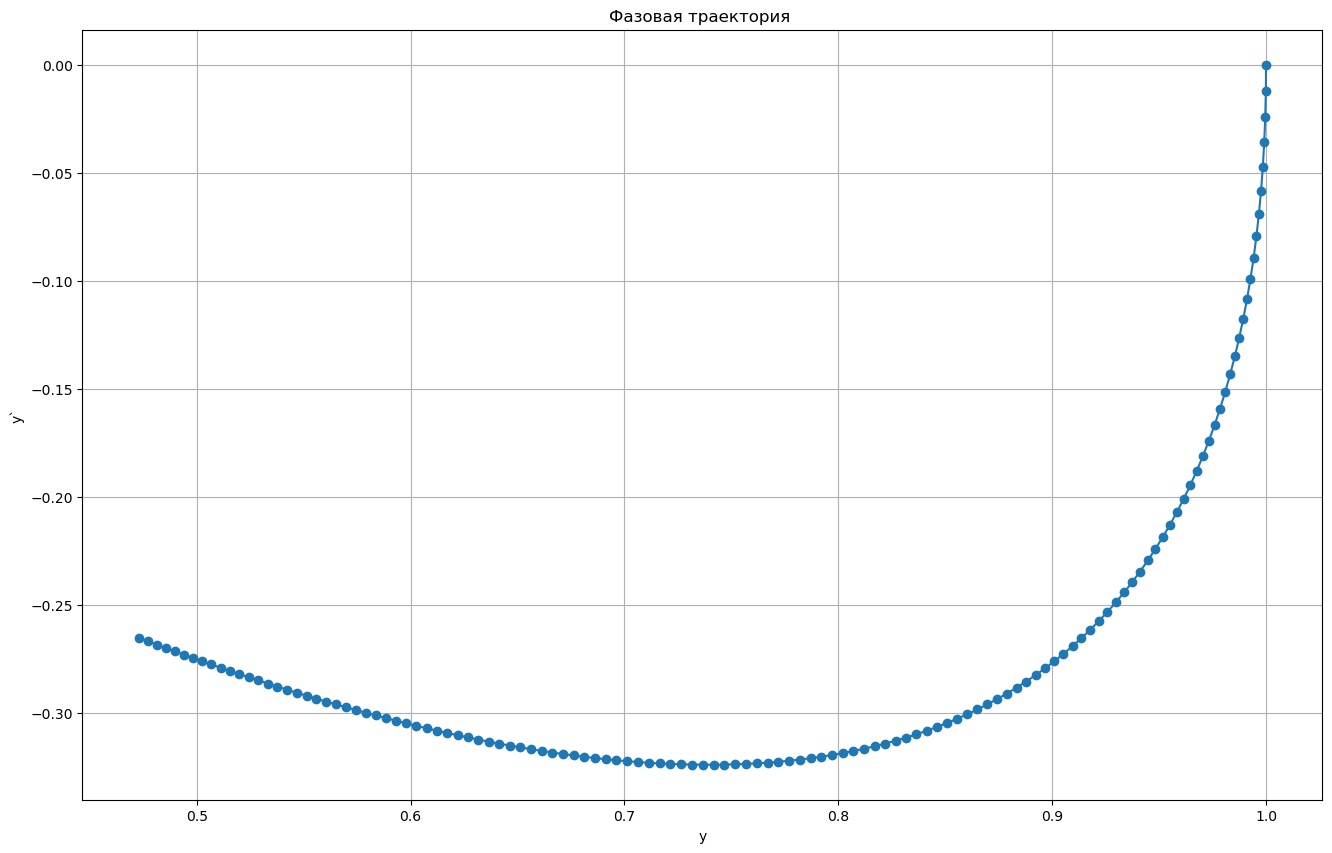

In [20]:
pylab.figure(figsize=(16, 10))
pylab.title('Фазовая траектория ')
pylab.xlabel('y')
pylab.ylabel('y`')
plt.grid(True)
pylab.plot(y, y1, 'o-')
pylab.show()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_7772\1964772772.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pylab.plot(x, y - res[:, 0], 'r-')


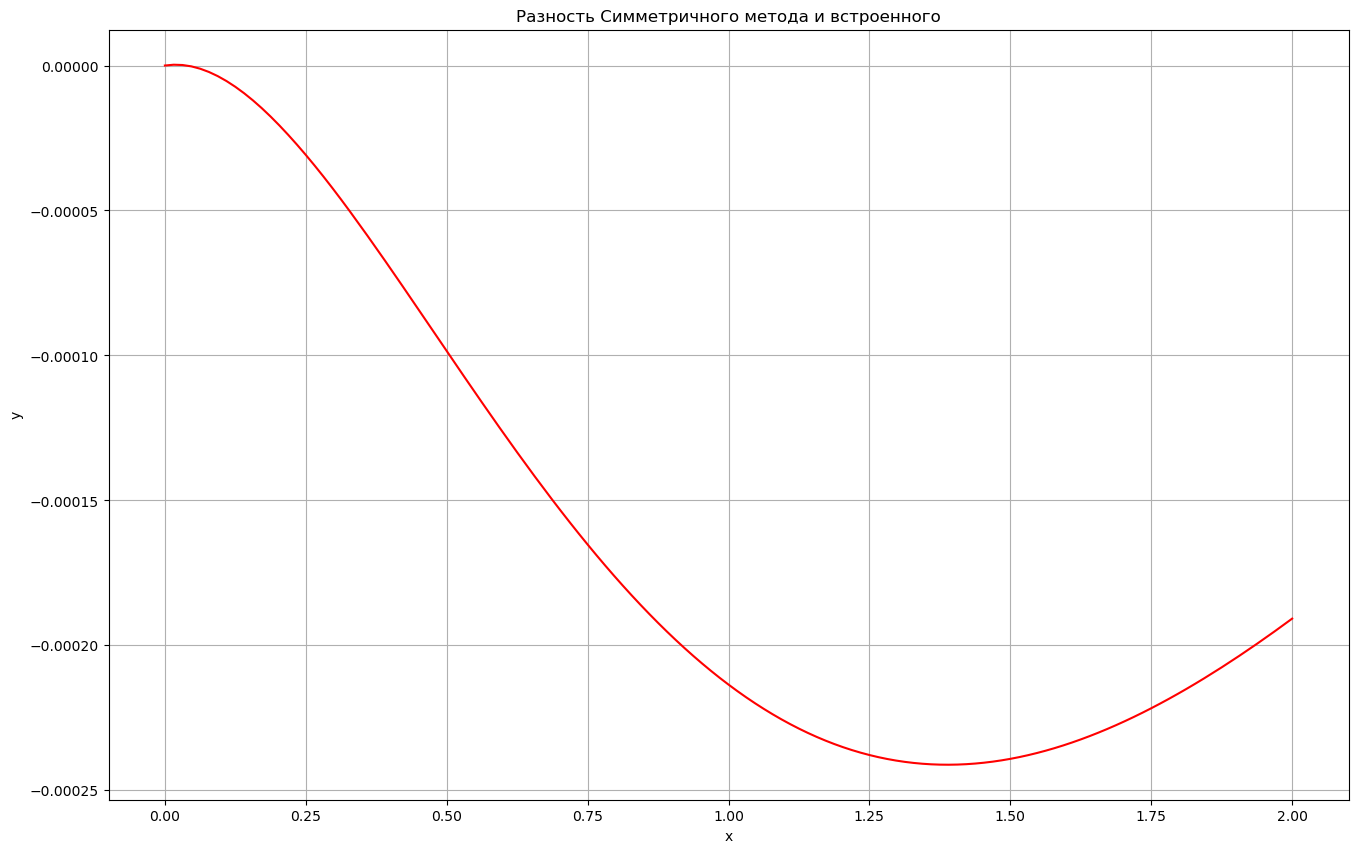

In [21]:
pylab.figure(figsize=(16, 10))
pylab.title('Разность Симметричного метода и встроенного')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, y - res[:, 0], 'r-')
pylab.show()

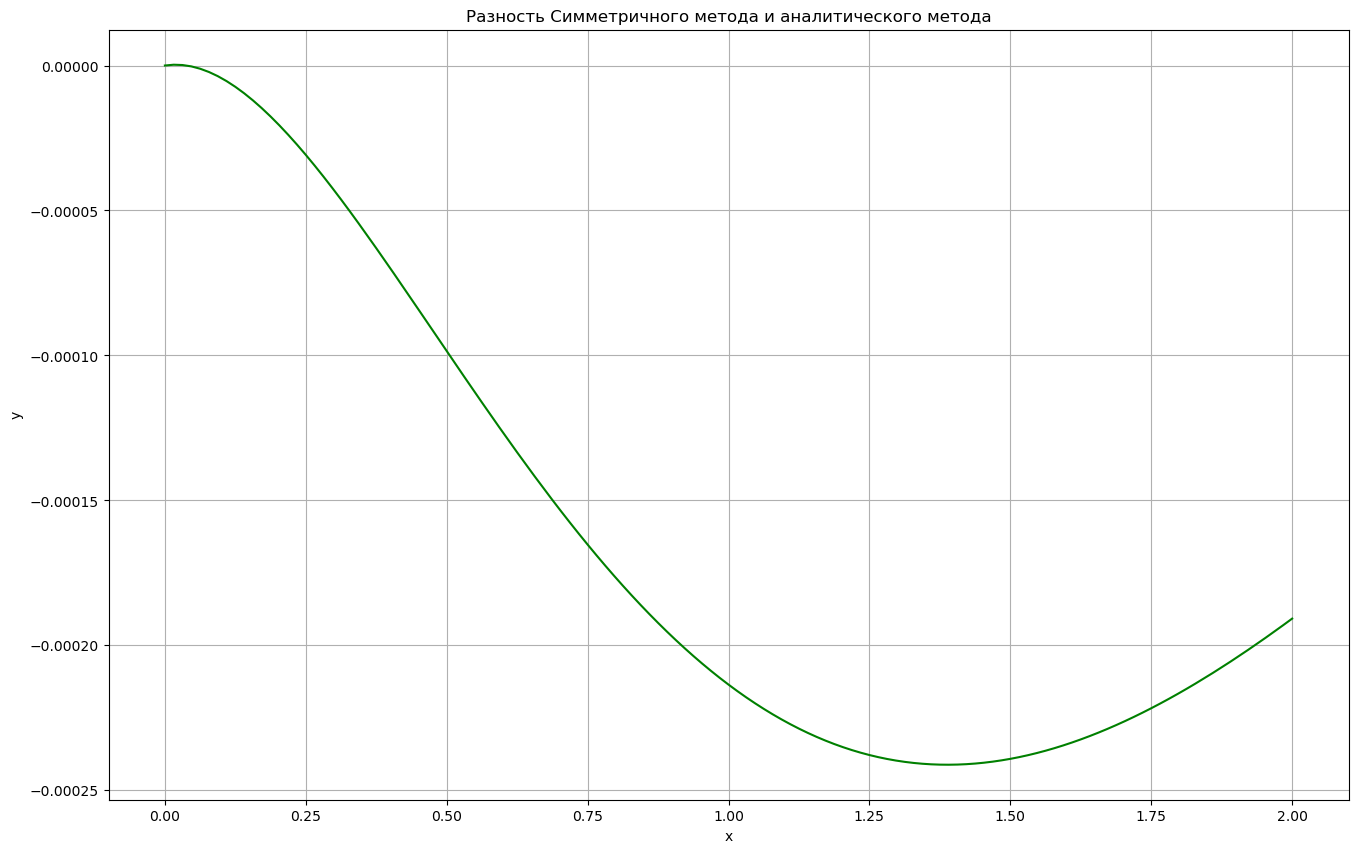

In [22]:
pylab.figure(figsize=(16, 10))
pylab.title('Разность Симметричного метода и аналитического метода')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid()
pylab.plot(x, yraz, 'g-')
pylab.show()

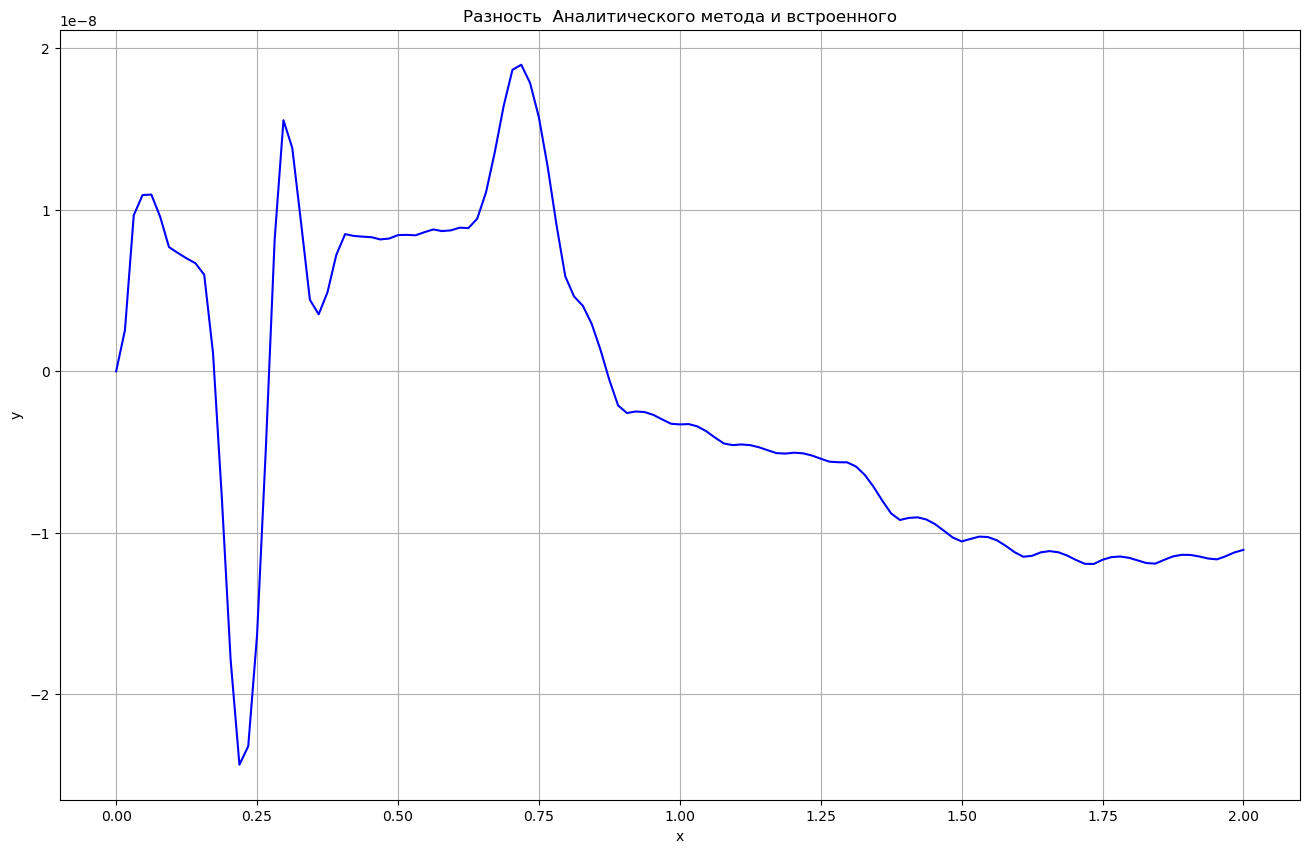

In [23]:
pylab.figure(figsize=(16, 10))
pylab.title('Разность  Aналитического метода и встроенного')
pylab.xlabel('x')
pylab.ylabel('y')
plt.grid(True)
pylab.plot(x, yA - res[:, 0], 'b-')
pylab.show()